In [32]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Tasks

## Ex 1

### Read lena.png and print the dimensions. 

In [5]:
lena = cv.imread("images/lena.png")
lena.shape

(512, 512, 3)

### Read chair.png and print the dimensions.

In [15]:
chair = cv.imread("images/chair.png")
chair.shape

(137, 137, 3)

### Verify if you are getting 4 channels in chair.png


In [21]:
chair = cv.imread("images/chair.png", cv.IMREAD_UNCHANGED)
chair.shape[-1]

4

### Plot the mask of the chair in the image chair.png

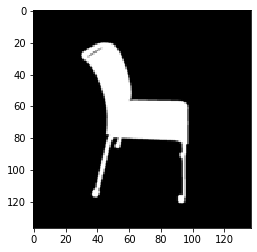

In [23]:
plt.imshow(chair[:,:,-1], cmap="gray")

## Ex 2

### Read lena.png in grayscale and shift the intensity values by 45 and visualize. 

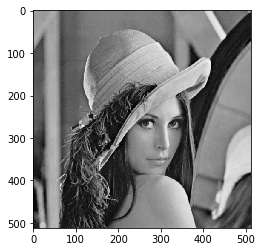

In [43]:
lena = cv.imread("images/lena.png", cv.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap="gray")

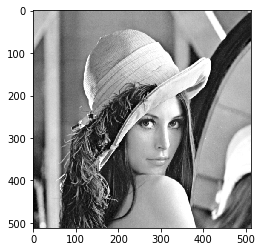

In [44]:
lena = lena.astype("uint16")
lena = np.clip(lena + 45, 0, 255).astype("uint8")

plt.imshow(lena, cmap="gray")

## Ex 3

### Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1

In [81]:
def gamma(img, c, y):
    img = img.astype("float32")
    img /= 255

    img = c * (img ** y)

    img *= 255
    img = np.clip(img, 0, 255)
    return img.astype("uint8")

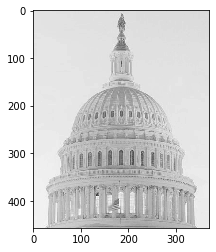

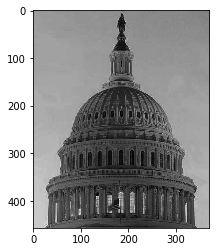

In [82]:
gamma1 = cv.imread("images/gamma1.jpg", cv.IMREAD_GRAYSCALE)
gamma2 = cv.imread("images/gamma2.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(gamma(gamma1, 1, 0.333), cmap="gray")
plt.show()
plt.imshow(gamma(gamma1, 1, 3), cmap="gray")

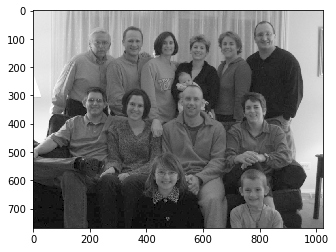

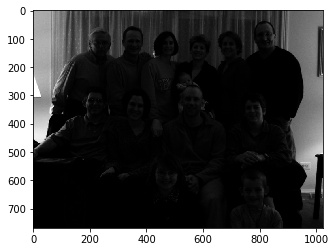

In [83]:
plt.imshow(gamma(gamma2, 1, 0.5), cmap="gray")
plt.show()
plt.imshow(gamma(gamma2, 1, 2), cmap="gray")

### histogram

In [269]:
def plot_histogram(img):
    colors = "bgr"
    if len(img.shape) == 2:
        n_channels = 1
        img = np.reshape(img, (*img.shape, 1))
    else:
        n_channels = img.shape[-1]
    
    for c in range(n_channels):
        plt.bar(*np.unique(img[:,:,c], return_counts=True), label=f"{c}", color=colors[c])
        plt.legend()
        plt.xlim((0, 255))
        plt.plot()

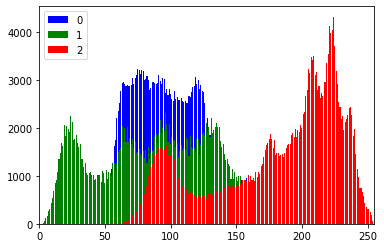

In [270]:
plot_histogram(cv.imread("images/lena.png"))

### thresholding

In [162]:
def thresh(img, th):
    return (img >= th).astype("uint8") * 255

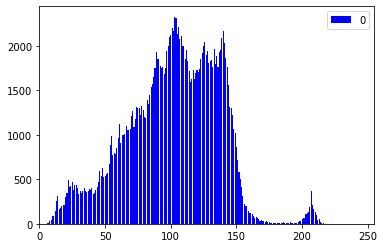

In [163]:
img = cv.imread("images/sudoku.jpeg", cv.IMREAD_GRAYSCALE)

plot_histogram(img)

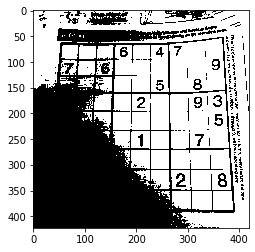

In [155]:
plt.imshow(thresh(img, 100), cmap="gray")

### convolution

In [206]:
def conv(img, filter):
    n1, m1 = img.shape[:2]
    n2, m2 = filter.shape[:2]

    xpad, ypad = (n2 - 1) // 2, (m2 - 1) // 2

    res = np.zeros(img.shape)

    for i in range(n1 - n2 + 1):
        for j in range(m1 - m2 + 1):
            res[xpad+i, ypad+j] = np.sum(np.dot(img[i:n2+i, j:m2+j], filter))

    return res

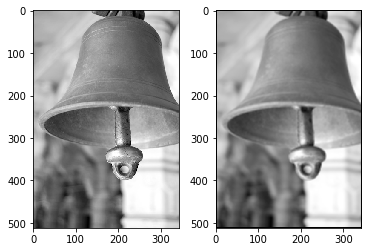

In [207]:
img = cv.imread("images/bell.jpg", cv.IMREAD_GRAYSCALE)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(img, cmap="gray")
ax = fig.add_subplot(122)
ax.imshow(conv(img, np.ones((5, 5)) / 9), cmap="gray")

### edge detection

In [279]:
def edge(img):
    filter1 = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    filter2 = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    fx = cv.filter2D(img, -1, filter1)
    fy = cv.filter2D(img, -1, filter2)

    edge = np.sqrt(np.square(fx.astype("int")) + np.square(fy.astype("int")))
    return fx, fy, edge

# HW

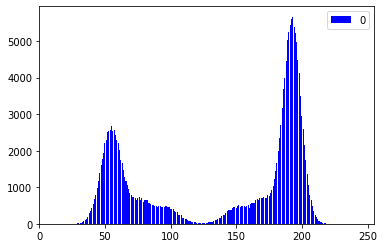

In [272]:
img = cv.imread("images/FingerPrint.jpg", cv.IMREAD_GRAYSCALE)

plot_histogram(img)

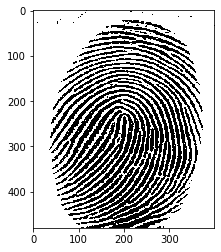

In [274]:
plt.imshow(thresh(img, 100), cmap="gray")

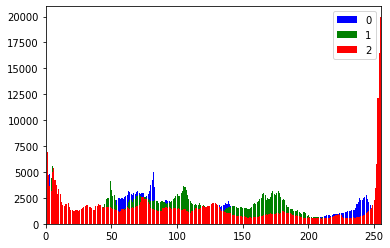

In [275]:
plot_histogram(cv.imread("images/lotus.jpg"))

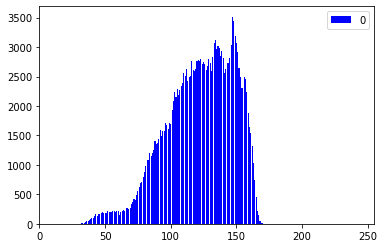

In [277]:
img = cv.imread("images/text.jpg", cv.IMREAD_GRAYSCALE)

plot_histogram(img)

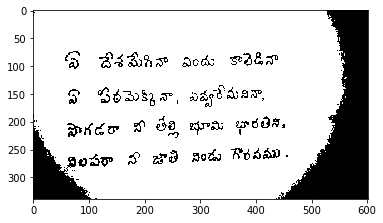

In [278]:
plt.imshow(thresh(img, 100), cmap="gray")

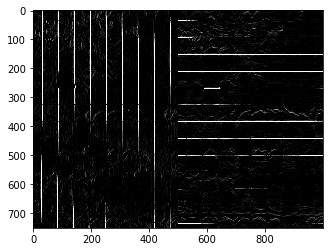

In [294]:
img = cv.cvtColor(cv.imread("images/window.jpeg"), cv.COLOR_BGR2GRAY)

kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

v = cv.filter2D(img, -1, kernel)

kernel2 = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

h = cv.filter2D(img, -1, kernel2)

plt.imshow(np.hstack([v, h]), cmap='gray')

In [298]:
def get_counts(arr, thresh=150):
    counts = 0
    count_more = True

    for x in arr:
        if x >= thresh and count_more:
            counts += 1
            count_more = True
        elif x < thresh:
            count_more = False

    return counts

vlines = round(np.mean([np.sum(get_counts(v[i,:])) for i in range(v.shape[0])]),0)
hlines = round(np.mean([np.sum(get_counts(h[:,i])) for i in range(h.shape[1])]),0)

"windows:", (vlines + 1) * (hlines + 1)

('windows:', 1.0)